## 2. Descriptive Analysis
For descriptive analysis, predominantly Pandas is used for data transformation, in conjunction with some useful visualization libraries, which help understanding of the obtained data.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import statsmodels.api as sm

def parse_time_value(time_string):
    # Parse the time string value and interpret it in seconds
    time_split = time_string.split(':')
    return int(time_split[0]) * 60.0 + float(time_split[1])

# Set some specs for plotting
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 8.0)
mpl.style.use('ggplot')
plt.rcParams['font.family'] = 'IPAGothic'

# Read data from the data folder
race_df = pd.read_csv('data/race.csv', low_memory=False, index_col=0)
horse_df = pd.read_csv('data/horse.csv', low_memory=False, index_col=0)
individual_df = pd.read_csv('data/individual.csv', low_memory=False, index_col=0)
trainer_df = pd.read_csv('data/trainer.csv', low_memory=False, index_col=0)
jockey_df = pd.read_csv('data/jockey.csv', low_memory=False, index_col=0)

## 2.1 Race

### 2.1.1 Race Dataframe 

In [2]:
# Do some type transformation for certain columns
race_df['run_time'] = race_df['run_time'].apply(lambda x: parse_time_value(x))
race_df['distance'] = race_df['distance'].apply(lambda x: re.search(r'(\d+)m', x).group(1)).astype(int)

# Overview of the dataframe structure
race_df.sample(n=5).T

,229517,378986,146224,379696,83381
run_date,2004-12-05,2008-02-10,2003-03-30,2008-02-02,2001-10-21
place,中京,京都,中山,小倉,京都
race,10R,3R,9R,11R,8R
title,つわぶき賞(500万下),3歳未勝利,隅田川特別(1000万下),和布刈特別(1000万下),黄菊賞(500万下)
type,芝,ダ,芝,ダ,芝
track,左,右,右,右,右
distance,1200,1400,2000,1700,1800
weather,晴,晴,晴,小雨,小雨
condition,稍重,不良,良,稍重,良
time,14:50,11:10,14:10,15:30,13:40


In [3]:
# Describe the numerical variables
race_df.describe()

,distance,bracket,horse_number,jockey_weight,run_time,win_odds,win_fav
count,376943.000000,376943.000000,376943.000000,376943.000000,376943.000000,376943.000000,376943.000000
mean,1610.870768,4.780179,7.735827,54.872268,100.496935,64.689108,7.706303
std,439.892528,2.263418,4.384175,1.842773,30.520783,92.946368,4.382195
min,1000.000000,1.000000,1.000000,48.000000,53.700000,1.000000,1.000000
25%,1200.000000,3.000000,4.000000,54.000000,74.400000,8.700000,4.000000
50%,1600.000000,5.000000,8.000000,55.000000,98.700000,25.900000,7.000000
75%,1800.000000,7.000000,11.000000,56.000000,114.800000,81.300000,11.000000
max,4250.000000,8.000000,18.000000,66.000000,308.100000,999.900000,176.900000


### 2.1.2 Race Condition 

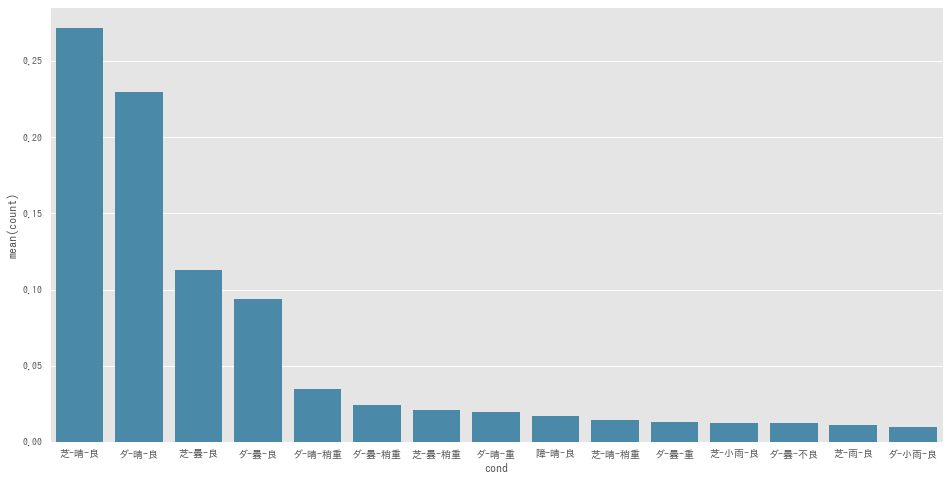

In [4]:
# Count the different race conditions
race_count = race_df.groupby(['type', 'weather', 'condition']).agg({'run_date': 'count'}).reset_index()
race_count.columns = ['type', 'weather', 'condition', 'count']
race_count['count'] = race_count['count'] / race_count['count'].sum()
race_count['cond'] = race_count['type'].str.cat(race_count['weather'], sep='-').str.cat(race_count['condition'], sep='-')
race_count_sorted = race_count.sort_values('count', ascending=False)[:15]
sns.barplot(y='count', x='cond', data=race_count_sorted, color='#3A8FB7')

### 2.1.3 Time and Distance

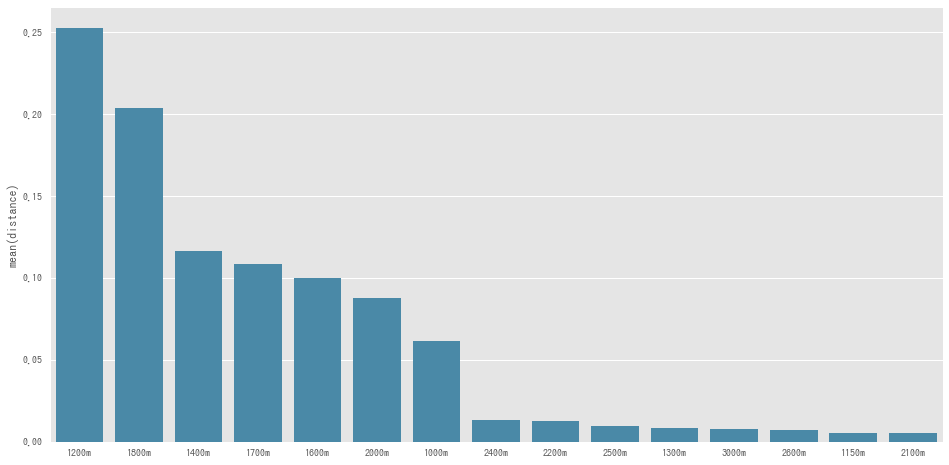

In [5]:
# Get the top run distance among the events
distance_count = race_df['distance'].value_counts()[:15]
distance_count.index = list(map(lambda x: '%sm' % str(x), distance_count.index))
sns.barplot(x=distance_count.index, y=distance_count/distance_count.sum(), color='#3A8FB7')

                            OLS Regression Results                            
Dep. Variable:               run_time   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.851e+08
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        19:32:19   Log-Likelihood:            -1.1209e+06
No. Observations:              376943   AIC:                         2.242e+06
Df Residuals:                  376942   BIC:                         2.242e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0628   4.62e-06   1.36e+04      0.0

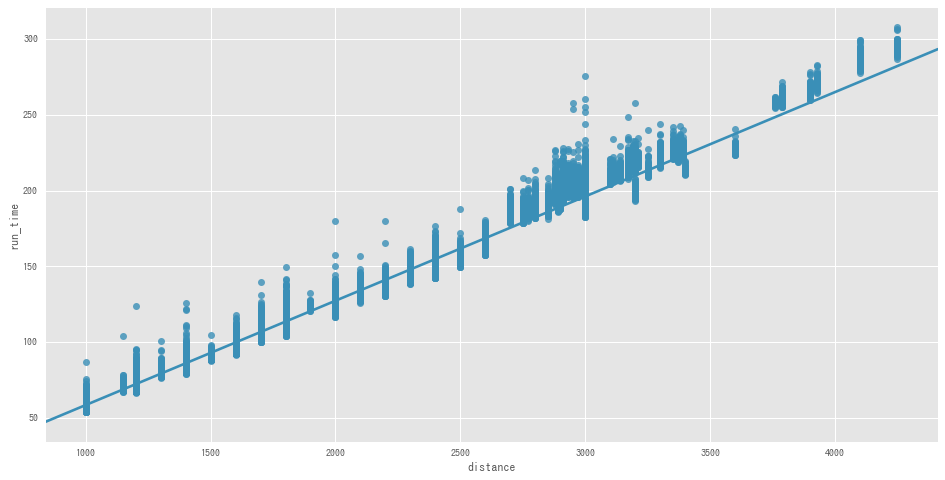

In [6]:
# Get the relationship between time and distance
dist_time = sm.OLS(race_df['run_time'], race_df['distance'])
dist_time_re = dist_time.fit()
print(dist_time_re.summary())
sns.regplot(y='run_time', x='distance', data=race_df, color='#3A8FB7')

## 2.2 Horse

### 2.2.1 Horse Dataframe 

In [7]:
# Do some type transformation for certain columns
horse_df['gender'] = horse_df['gender'].apply(lambda x: x[0])

# Overview of the dataframe structure
horse_df.sample(n=5).T

,17793,2996,32885,24309,9000
horse_name,ローレルエミシ,プリティジョージ,ウエスタンオーザ,ベルグタッチ,ウィナーズキャリー
date_of_birth,2000年3月31日,1996年5月15日,2004年4月13日,2002年4月15日,1998年4月23日
trainer,田嶋弘幸 (金沢),菅谷禎高 (栗東),尾形充弘 (美浦),小野寺三 (岩手),山崎尋美 (川崎)
owner,高橋利寿,加藤守,西川賢,広瀬由一,有新和
breeder,谷川博勝,林時春,北西牧場,山本昇寿,今野活博
place_of_birth,青森県,様似町,静内町,三石町,新冠
transaction_price,525万円 (2001年 八戸10月市場),-,-,-,-
prize_obtained,37万円 (地方),162万円 (中央),605万円 (中央) /279万円 (地方),36万円 (地方),750万円 (地方)
race_record,13戦1勝 [ 1-0-3-9 ],11戦0勝 [ 0-0-0-11 ],39戦1勝 [ 1-4-3-31 ],20戦1勝 [ 1-1-0-18 ],18戦2勝 [ 2-2-2-12 ]
highlight_race,C312,NaN,C2四 五,3歳 C3,90万円以上300万円未満


In [8]:
# Describe the columns of the dataframe
horse_df.describe().T

,count,unique,top,freq
horse_name,40335,40335,リッシンボス,1
date_of_birth,40335,2136,2002年4月3日,72
trainer,40335,1533,和田正道 (美浦),186
owner,40334,4979,社台レースホース,616
breeder,40320,3295,社台ファーム,1518
place_of_birth,40335,93,浦河町,7702
transaction_price,40335,3492,-,33686
prize_obtained,40335,18439,0万円,6476
race_record,40335,14251,2戦0勝 [ 0-0-0-2 ],1453
highlight_race,27463,8076,C2,583


### 2.2.2 Gender and Breed 

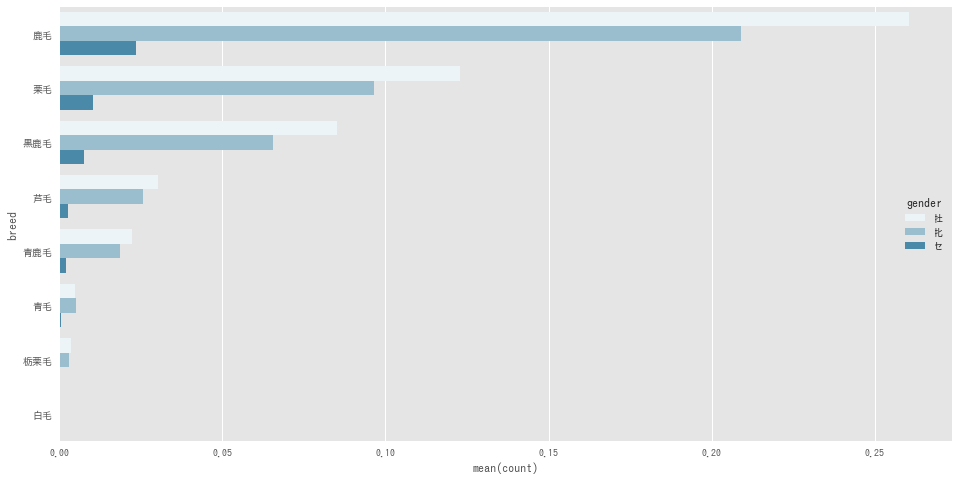

In [9]:
# Get gender and breed information
breed_gender_count = horse_df.groupby(['breed', 'gender']).agg({'horse_name': 'count'}).reset_index()
breed_gender_count.columns = ['breed', 'gender', 'count']
breed_gender_count = breed_gender_count.sort_values('count', ascending=False)
breed_gender_count['count'] = breed_gender_count['count'] / breed_gender_count['count'].sum()
sns.barplot(x='count', y='breed', data=breed_gender_count, color='#3A8FB7', hue='gender')

### 2.2.3 Horse and Run Time

In [10]:
# Merge race and horse dataframe and alter datetime type of information
horse_race = race_df.merge(horse_df, left_on='horse', right_on='horse_name')
horse_race['run_date'] = horse_race['run_date'].str.cat(horse_race['time'], sep=' ').apply(lambda x: pd.Timestamp(x))
horse_race['date_of_birth'] = horse_race['date_of_birth'].apply(lambda x: pd.Timestamp('-'.join(re.findall(r'\d+', x))))
horse_race['curr_age'] = horse_race['run_date'].subtract(horse_race['date_of_birth']).dt.days / 365.0
horse_race.sample(n=5).T

,133884,140351,75053,360580,274072
run_date,2002-07-28 16:15:00,2001-11-04 10:15:00,2002-04-20 14:55:00,2007-03-18 10:20:00,2004-10-30 10:40:00
place,新潟,福島,新潟,中京,京都
race,12R,2R,10R,2R,2R
title,3歳上500万下,2歳新馬,湯沢特別(500万下),3歳未勝利,2歳未勝利
type,芝,芝,芝,ダ,ダ
track,左,右,左,左,右
distance,1600,1000,1400,1700,1400
weather,晴,曇,晴,晴,雨
condition,良,稍重,良,良,良
time,16:15,10:15,14:55,10:20,10:40


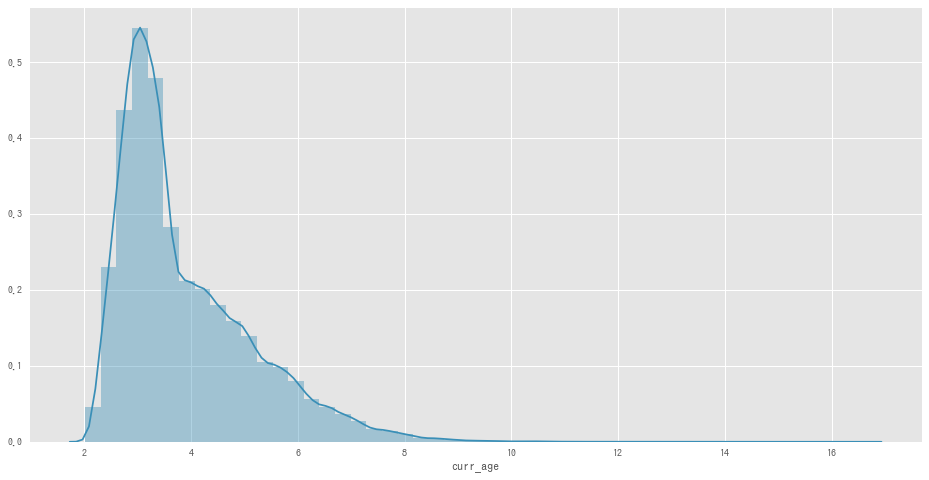

In [11]:
# Get the histogram of horse age relative to the run date and time
sns.distplot(horse_race['curr_age'], color='#3A8FB7')

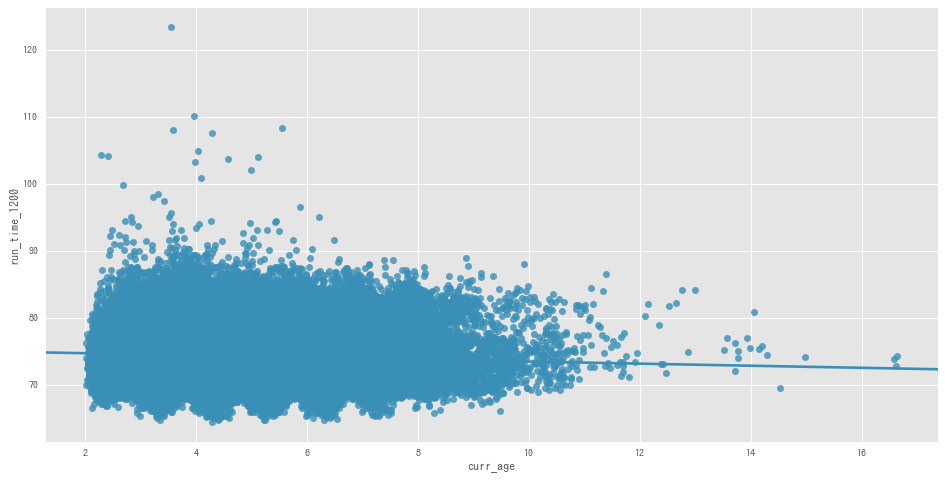

In [12]:
horse_race['run_time_1200'] = horse_race['run_time'] / (horse_race['distance'] / 1200)
sns.regplot(x='curr_age', y='run_time_1200', data=horse_race, color='#3A8FB7')

## 2.3 Individuals

In [13]:
# Do some type transformation for certain columns
for columns in list(individual_df.columns)[2:-1]:
    individual_df[columns] = individual_df[columns].apply(lambda x: x.replace(',', '') 
                                                          if type(x) not in [int, float] else x).astype(float)

# Overview of the dataframe structure
individual_df.sample(n=5).T

,17366,72066,83497,84663,83646
individual_type,騎手,馬主,馬主,馬主,生産者
name,吉田稔,犬飼笠介,高田三郎,平田友里恵,Dunchurch Lodge Stud Co
year,2004,1994,2005,2007,2007
rank,37,1452,1175,924,781
first,27,0,0,0,1
second,29,0,0,1,0
third,25,0,0,0,0
out,279,2,3,0,3
races_major,14,0,0,0,0
wins_major,2,0,0,0,0


In [14]:
# Describe the columns of the dataframe
individual_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,88047.0,2001.490692,8.093176,1986.0,1995.0,2002.000,2007.000,2018.0
rank,88047.0,632.813577,456.464842,1.0,198.0,572.000,1051.000,1547.0
first,88047.0,4.069406,11.471869,0.0,0.0,1.000,3.000,592.0
second,88047.0,4.052347,10.528719,0.0,0.0,1.000,4.000,517.0
third,88047.0,4.044840,9.913485,0.0,0.0,1.000,4.000,437.0
out,88047.0,41.074869,85.794655,0.0,4.0,12.000,35.000,3390.0
races_major,88047.0,2.145933,7.584938,0.0,0.0,0.000,1.000,476.0
wins_major,88047.0,0.152044,0.827689,0.0,0.0,0.000,0.000,51.0
races_special,88047.0,12.131282,30.364732,0.0,0.0,3.000,10.000,1423.0
wins_special,88047.0,0.945654,3.147364,0.0,0.0,0.000,1.000,170.0


## 2.4 Jockey and Trainer Profile 

In [15]:
# Do some type transformation for certain columns
for columns in trainer_df.columns:
    trainer_df[columns] = trainer_df[columns].apply(lambda x: np.nan if x == 'null' else x)

for columns in jockey_df.columns:
    jockey_df[columns] = jockey_df[columns].apply(lambda x: np.nan if x == 'null' else x)
    if columns in ['height', 'weight']:
        jockey_df[columns] = jockey_df[columns].apply(lambda x: x if pd.isnull(x) else re.search(r'\d+', x).group(0))
        jockey_df[columns] = jockey_df[columns].astype(float)

# Overview of the dataframe structure
trainer_df.sample(n=5).T

,506,60,203,316,365
trainer_name,[地]平石勉,[西]鶴留明雄,[東]畠山重則,[外]ウィリア,[地]黒川武
date_of_birth,1960/09/04,1941/03/27,1944/08/02,1960/05/10,1939/11/27
place_of_birth,地方,鹿児島県,北海道,地方,地方
first_run_date,NaN,1978/07/02,1980/10/11,NaN,NaN
first_run_horse,NaN,シルエット,ミスマッキンレー,NaN,NaN
first_win_date,NaN,1978/10/15,1980/12/06,NaN,NaN
first_win_horse,NaN,アウンエスラー,グリーンエコー,NaN,NaN


In [16]:
# Overview of the dataframe structure
jockey_df.sample(n=5).T

,631,590,146,227,240
jockey_name,田中力,湯前良人,北村宏司,宮下康一,見沢譲治
date_of_birth,1982/08/18,1977/04/07,1980/07/24,1974/01/10,1962/03/13
place_of_birth,地方,地方,長野県,地方,地方
blood_type,NaN,NaN,A型,NaN,NaN
height,NaN,NaN,155,NaN,NaN
weight,NaN,NaN,45,NaN,NaN
first_flat_run_date,NaN,2006/02/25,1999/03/06,1998/03/14,1995/03/26
first_flat_run_horse,NaN,モエレソシアル,イブキアーンドラン,ビックワン,オッシレーター
first_flat_win_date,NaN,NaN,1999/03/14,NaN,NaN
first_flat_win_horse,NaN,NaN,タイキコンコルド,NaN,NaN


In [17]:
# Describe the columns of the dataframe
trainer_df.describe().T

,count,unique,top,freq
trainer_name,839,839,[地]稲葉道行,1
date_of_birth,839,810,1944/08/18,2
place_of_birth,839,36,地方,617
first_run_date,220,153,1999/03/06,8
first_run_horse,220,220,インターイズミ,1
first_win_date,220,208,1999/04/04,3
first_win_horse,220,220,ムービングシーン,1


In [18]:
# Describe the columns of the dataframe
jockey_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
jockey_name,632,632,森安輝正,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_birth,632,616,1971/03/12,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_of_birth,632,36,地方,437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_type,193,4,A型,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,195,NaN,NaN,NaN,161.472,4.10343,149,159,162,164,174
weight,195,NaN,NaN,NaN,48.6256,2.98421,44,46,48,51,59
first_flat_run_date,599,337,1996/03/02,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_run_horse,599,591,フェアリーキングプローン,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_win_date,367,331,2007/03/10,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_win_horse,367,365,タマルファイター,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
